# LINQ (Language Intergrated Query)

## Qu’est-ce le LINQ?

Le LINQ est un micro-langage qui ressemble au SQL.

Ce langage sert à adresser le model de développement de base de données dans un contexte de programmation orientée objet.

LINQ peut être utilisé pour interagir (sélectionner, ajouter, supprimer, modifier, etc.) d’une manière uniforme et fortement typé avec :

- Des collections et tableaux : LINQ to Object
- Des bases de données : LINQ to DataSet et LINQ to Entities
- Des fichiers XML : LINQ to XML


## Le LINQ

Le type de retour d’une expression LINQ est « `IEnumerable<T>` » où T est le type d’objet retrouvé à l’intérieur de la collection quelconque (que ce soit en XML, avec une base de données, etc.)
 
Une expression LINQ est seulement exécutée lors de la première itération du « `IEnumerable<T>` » retournée

- Afin d’exécuter une expression LINQ en entier, les méthodes « `ToList` », « `ToArray` » et « `ToDictionary` » vont itérer chaque item (donc exécute l’expression au complet) et les retourner dans la collection désirée.

## LINQ to Object

Une expression LINQ peut être utilisée pour sélectionner des objets d’une collection ou d’un tableau.

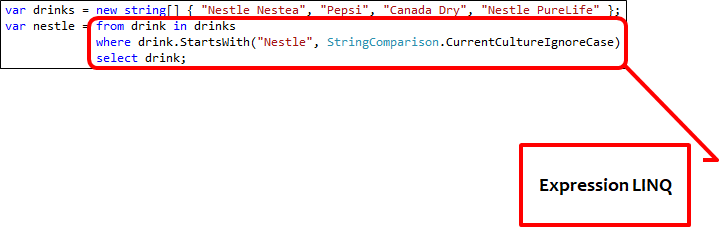

Le type de retour de l’exemple précédente va être `IEnumerable<string>`.

Une expression LINQ peut également faire la sélection basée (where) sur les propriétés d’un objet.

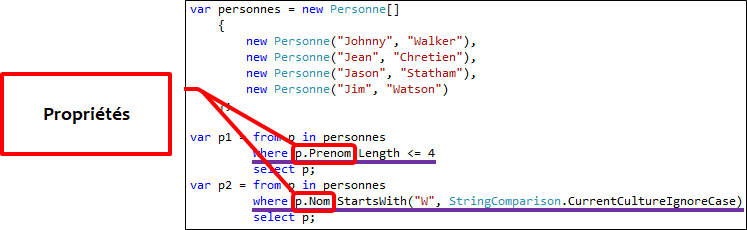

## Les opérateurs LINQ

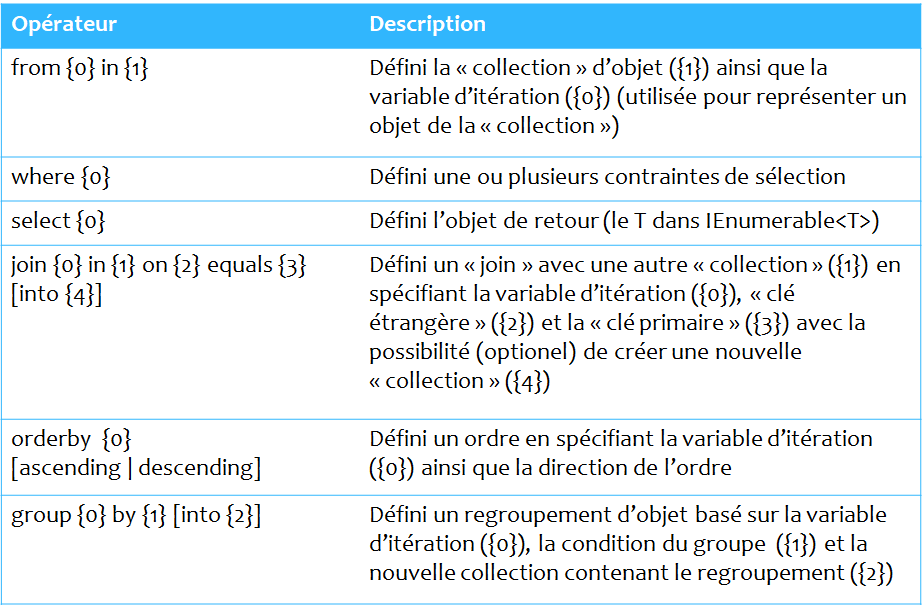

Une expression LINQ de base est constituée d’un opérateur « `from {0} in {1}` » et suivie d’un opérateur « `select {0}` ».

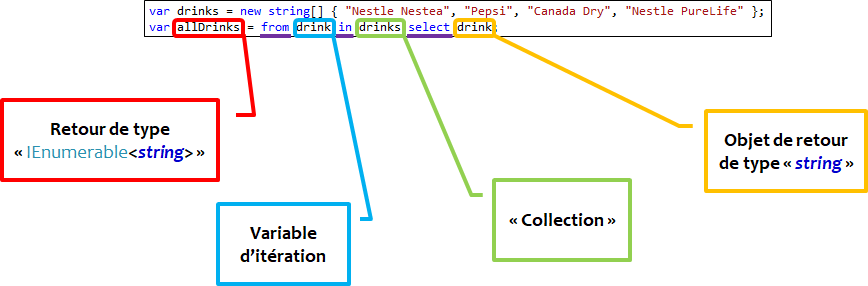

In [6]:
// ===========================================================================
// From et select
// ===========================================================================

var drinks = new string[] { "Nestle Nestea", "Pepsi", "Canada Dry", "Nestle PureLife" };

var allDrinks = from drink in drinks select drink;

[Transact-SQL Logical Processing Order of the SELECT statement
](https://docs.microsoft.com/en-us/sql/t-sql/queries/select-transact-sql?view=sql-server-ver15)

Une expression LINQ avec contraintes contient l’opérateur « `where {0}` » avant l’opérateur « `select {0}` » 

- L’opérateur « `from {0} in {1}` » est toujours le premier
- L’opérateur « `select {0}` » est toujours le dernier
- Le {0} dans l’opérateur « `where {0}` » représente une condition, donc une valeur booléenne (tout comme avec un « if »)

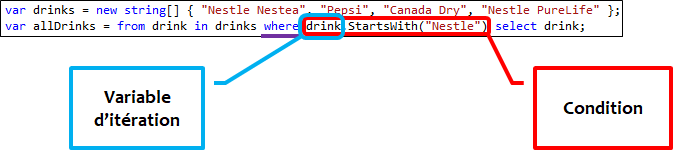

In [7]:
// ===========================================================================
// Where
// ===========================================================================

var drinks = new string[] { "Nestle Nestea", "Pepsi", "Canada Dry", "Nestle PureLife" };

var allDrinks = from drink in drinks
                where drink.StartsWith("Nestle")
                select drink;

## Type anonyme

Un type anonyme représente un objet ayant une définition créée au moment de l’initialisation mais étant fortement-typé.

Comme une méthode anonyme, un type anonyme est la déclaration et l’initialisation d’un objet sans nom.

Un type anonyme est défini et initialisé en :

- Indiquant le mot clé « `new` » (nouvelle instance)
- Suivi d’accolades (`{` `}`)
- Propriétés séparés par des virgules entre les accolades
  - Le nom de la propriété
  - Le signe d’égale
  - La valeur de la propriété

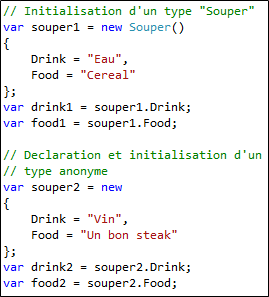

## Les opérateurs LINQ

Une expression LINQ peut également avoir plusieurs opérateurs « `from {0} in {1}` » afin de combiner des collections mais n’ayant aucune relation entre elles.

L’objet de retour peut également retourner un type anonyme.

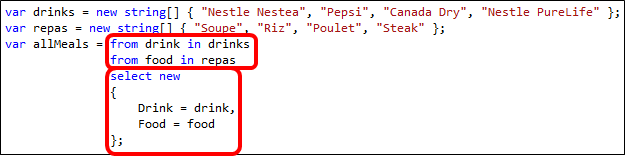

In [24]:
var drinks = new string[] { "Nestle Nestea", "Pepsi", "Canada Dry", "Nestle PureLife" };
var repas = new string[] { "Soupe", "Riz", "Poulet", "Steak" };

var allMeals = from drink in drinks
               from food in repas
               select new //Meal
               {
                   Drink = drink,
                   Food = food
               };

foreach (var meal in allMeals)
{
    Console.WriteLine(meal.Food.PadRight(10) + meal.Drink);
}

Soupe     Nestle Nestea
Riz       Nestle Nestea
Poulet    Nestle Nestea
Steak     Nestle Nestea
Soupe     Pepsi
Riz       Pepsi
Poulet    Pepsi
Steak     Pepsi
Soupe     Canada Dry
Riz       Canada Dry
Poulet    Canada Dry
Steak     Canada Dry
Soupe     Nestle PureLife
Riz       Nestle PureLife
Poulet    Nestle PureLife
Steak     Nestle PureLife


Une expression LINQ ordonnée contient l’opérateur « `orderby {0}` [`ascending` | `descending`] » avant l’opérateur « `select {0}` » (mais après l’opérateur « `where {0}` »).

- L’ordre va être de manière ascendante (ascending) par défaut.

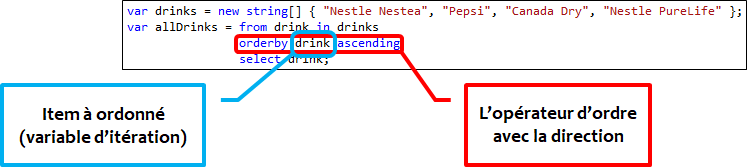

In [37]:
// ===========================================================================
// Order By
// ===========================================================================

var drinks = new string[] { "Nestle Nestea", "Pepsi", "Canada Dry", "Nestle PureLife" };

var allDrinks = from drink in drinks
                orderby drink ascending
                select drink;

foreach (var drink in allDrinks)
{
    Console.WriteLine(drink);
}

Canada Dry
Nestle Nestea
Nestle PureLife
Pepsi


Une expression LINQ avec regroupement contient l’opérateur « `group {0} by {1} [into {2}]` ».

- Si le « `into` » optionnel n’est pas utilisé, l’expression va retourner automatiquement la nouvelle collection regroupée (de `IGrouping<TKey,TElement>`); donc un opérateur « `select {0}` » ne peut pas être spécifié.

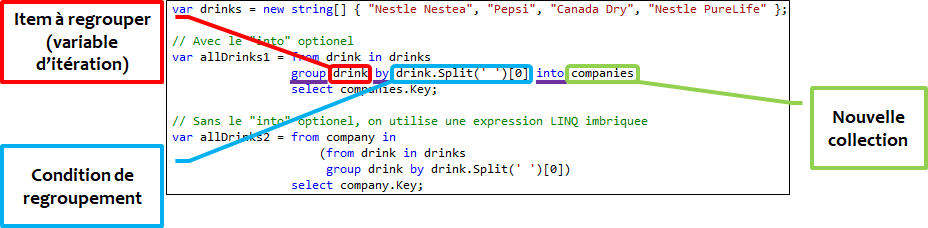

Une collection de regroupement - c’est-à-dire une liste de `IGrouping<TKey,TElement>` - est également une liste avec une propriété « Key » additionnelle indiquant la valeur partagée entre tous les éléments de la liste de regroupement.

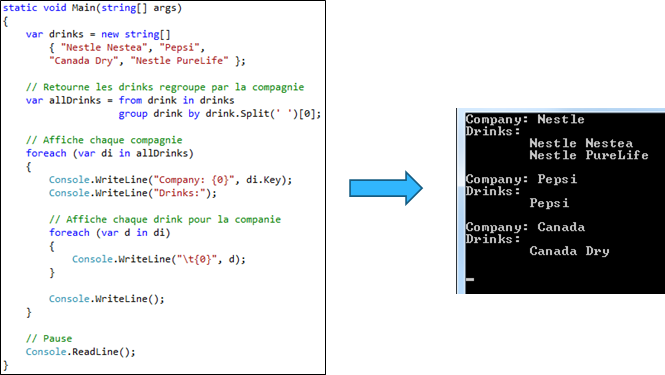

In [30]:
// ===========================================================================
// Group By (demo 1 et 2)
// ===========================================================================

var drinks = new string[] { "Nestle Nestea", "Pepsi", "Canada Dry", "Nestle PureLife" };

// Avec le "into" optionel
var allDrinks1 = from drink in drinks
                 //where drink.StartsWith("N")
                 group drink by drink.Split(' ')[0] into companies
                 select companies.Key;

// Sans le "into" optionel, on utilise une expression LINQ imbriquee
var allDrinks2 = from company in
                     (from drink in drinks
                      group drink by drink.Split(' ')[0])
                 select company.Key;

foreach (var drink in allDrinks1)
{
    Console.WriteLine(drink);
}

Console.WriteLine();

foreach (var drink in allDrinks2)
{
    Console.WriteLine(drink);
}

Nestle
Pepsi
Canada

Nestle
Pepsi
Canada


In [29]:
// ===========================================================================
// Group By (demo 3)
// ===========================================================================

var drinks = new string[] { "Nestle Nestea", "Pepsi", "Canada Dry", "Nestle PureLife" };

// Retourne les drinks regroupé par la compagnie
var allDrinksParCompagnie = from drink in drinks
                            group drink by drink.Split(' ')[0];

// Affiche chaque compagnie
foreach (var compagnie in allDrinksParCompagnie)
{
    Console.WriteLine("Company: {0}", compagnie.Key);
    Console.WriteLine("Drinks: {0}", compagnie.Count());

    // Affiche chaque drink pour la companie
    foreach (var drink in compagnie)
    {
        Console.WriteLine("\t{0}", drink);
    }

    Console.WriteLine();
}

Company: Nestle
Drinks: 2
	Nestle Nestea
	Nestle PureLife

Company: Pepsi
Drinks: 1
	Pepsi

Company: Canada
Drinks: 1
	Canada Dry



Une expression LINQ peut combiner plusieurs collections différentes tout en liant les collections avec une relation quelconque
Cela peut être accompli avec l’opérateur « `join {0} in {1} on {2} equals {3} [into {4}]` »

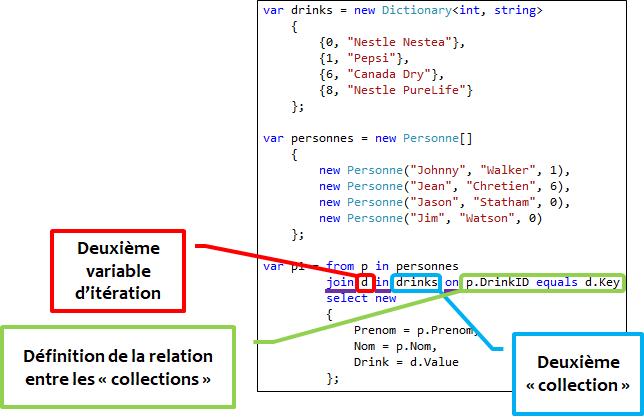

In [ ]:
// ===========================================================================
// Join (demo 1)
// ===========================================================================

var drinks = new Dictionary<int, string>
    {
        { 0, "Nestle Nestea"   },
        { 1, "Pepsi"           },
        { 6, "Canada Dry"      },
        { 8, "Nestle PureLife" }
    };

//var personnes = new Personne[]
//    {
//        new Personne("Johnny", "Walker", 1),
//        new Personne("Jean", "Chretien", 6),
//        new Personne("Jason", "Statham", 0),
//        new Personne("Jim", "Watson", 0)
//    };

var personnes1 = new Tuple<string, string, int>[]
    {
        new Tuple<string, string, int>("Johnny", "Walker",   1),
        new Tuple<string, string, int>("Jean",   "Chretien", 6),
        new Tuple<string, string, int>("Jason",  "Statham",  0),
        new Tuple<string, string, int>("Jim",    "Watson",   0)
    };

var p1 = from p in personnes1
         join d in drinks on p.Item3 equals d.Key
         select new
         {
             Prenom = p.Item1,
             Nom = p.Item2,
             Drink = d.Value
         };


foreach (var item in p2)
{
    Console.WriteLine($"{item.Prenom} {item.Nom} boit un {item.Drink}");
}

In [33]:
// ===========================================================================
// Join (demo 2)
// ===========================================================================

var drinks = new Dictionary<int, string>
    {
        { 0, "Nestle Nestea"   },
        { 1, "Pepsi"           },
        { 6, "Canada Dry"      },
        { 8, "Nestle PureLife" }
    };

var personne2 = new (string Prenom, string Nom, int DrinkId)[]
{
        ("Johnny", "Walker",   1),
        ("Jean",   "Chretien", 6),
        ("Jason",  "Statham",  0),
        ("Jim",    "Watson",   0)
};

var p2 = from p in personne2
         join d in drinks on p.DrinkId equals d.Key
         select new
         {
             Prenom = p.Prenom, // IDE0037 C# Member name can be simplified 
             p.Nom,
             Drink = d.Value
         };
         
foreach (var item in p2)
{
    Console.WriteLine($"{item.Prenom} {item.Nom} boit un {item.Drink}");
}

Johnny Walker boit un Pepsi
Jean Chretien boit un Canada Dry
Jason Statham boit un Nestle Nestea
Jim Watson boit un Nestle Nestea


In [36]:
// ===========================================================================
// Join (demo 3)
// ===========================================================================

var p3 = personne2
    .Join(
        drinks,                   // la collection
        inner => inner.DrinkId,   // le inner selector
        outer => outer.Key,       // le outer selector
        (inner, outer) => new     // le nouveau type anonyme
        {
            p = inner,
            d = outer
        })
    .Select(x => new
        {
            Prenom = x.p.Prenom,
            Nom= x.p.Nom,
            Drink = x.d.Value
        });

foreach (var item in p3)
{
    Console.WriteLine($"{item.Prenom} {item.Nom} boit un {item.Drink}");
}

Johnny Walker boit un Pepsi
Jean Chretien boit un Canada Dry
Jason Statham boit un Nestle Nestea
Jim Watson boit un Nestle Nestea


## Syntaxe de requête et syntaxe de méthode

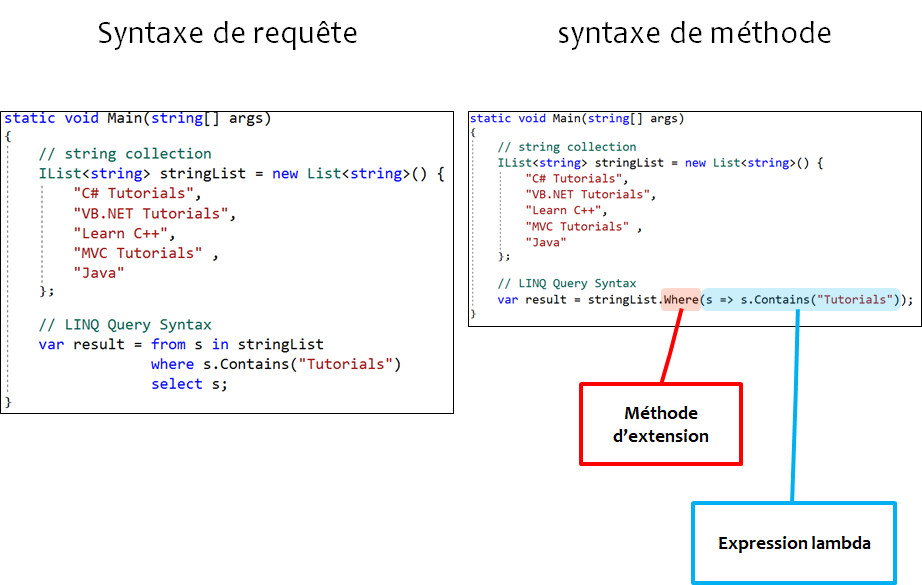

In [3]:
// ===========================================================================
// Syntaxe de requête
// ===========================================================================

var drinks = new string[] { "Nestle Nestea", "Pepsi", "Canada Dry", "Nestle PureLife" };

var nestle = from drink in drinks
             where drink.StartsWith("Nestle", StringComparison.CurrentCultureIgnoreCase)
             select drink;

foreach (var drink in nestle)
{
    Console.WriteLine(drink);
}

Nestle Nestea
Nestle PureLife


In [4]:
// ===========================================================================
// Syntaxe de méthode
// ===========================================================================

var drinks = new string[] { "Nestle Nestea", "Pepsi", "Canada Dry", "Nestle PureLife" };

var nestle = drinks
    .Where(x => x.StartsWith("Nestle", StringComparison.CurrentCultureIgnoreCase))
    .Select(x => x);

foreach (var drink in nestle)
{
    Console.WriteLine(drink);
}

Nestle Nestea
Nestle PureLife


## Opérateurs de requête standard

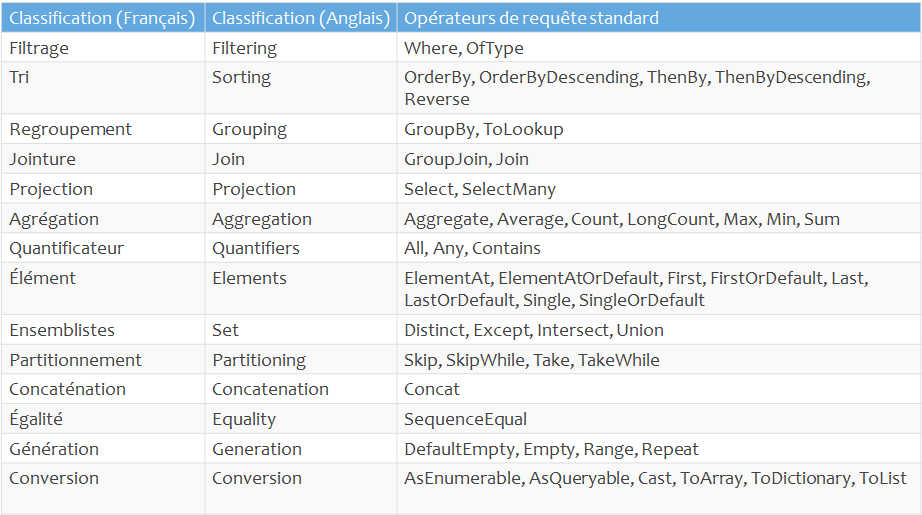

https://docs.microsoft.com/en-us/dotnet/csharp/programming-guide/concepts/linq/standard-query-operators-overview

## Exécution de requête différée

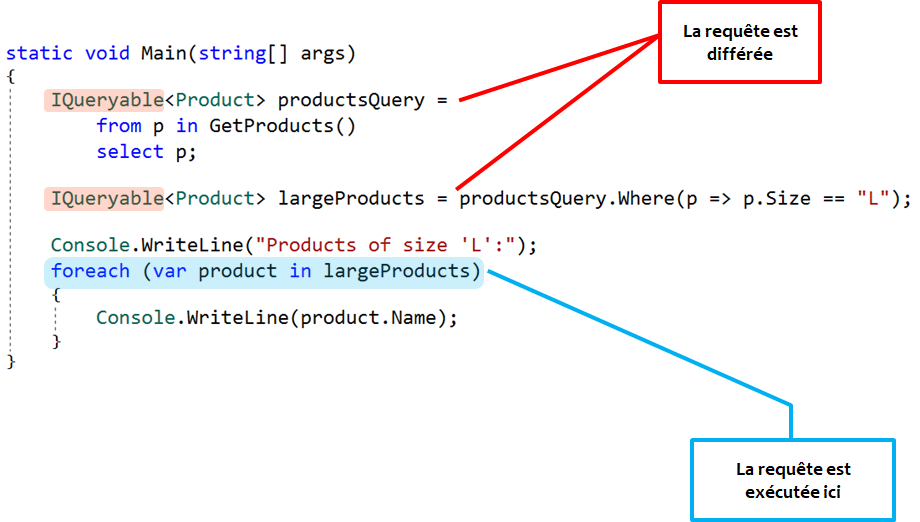

## Exécution de requête immédiate

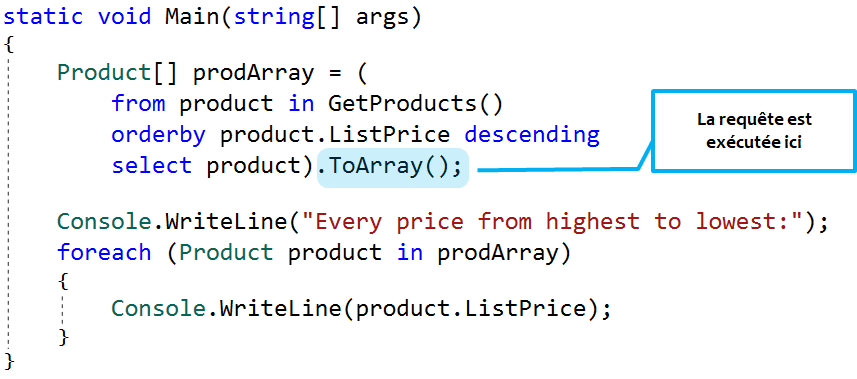

In [9]:
public interface IPersonne
{
    int Age { get; set; }
}

public class Personne : IPersonne, IComparer<Personne>, IComparable<Personne>
{
    public Personne(string prenom = null, string nom = null, int drinkID = 0)
    {
        Prenom = prenom;
        Nom = nom;
        DrinkID = drinkID;
    }
    
    public string Prenom { get; set; }
    public string Nom { get; set; }
    public int DrinkID { get; set; }
    public int Age { get; set; }

    public int Compare(Personne x, Personne y)
    {
        return string.CompareOrdinal(x.Prenom + x.Nom, y.Prenom + y.Nom);
    }

    public int CompareTo(Personne other)
    {
        return this.Compare(this, other);
    }
}

In [14]:
// ===========================================================================
// Les extentions
// Comment ajouter une méthode à une classe ou interface
// ===========================================================================

/*
// Attention, pas possible avec .NET interactive (Jupyter Notebook)
public static class PersonneExtention
{
    public static bool EstPlusQue20(this Personne p)
    {
        return p.Age > 20;
    }

    public static string AjoutePatateAuNom(this Personne p)
    {
        return p.Nom + " Patate";
    }
}

public static class StringExtentions
{
    public static bool IsNullOrWhiteSpaceParPierLuc(this string s)
    {
        return string.IsNullOrWhiteSpace(s);
    }
}
*/

In [18]:
/*
// Attention, pas possible avec .NET interactive (Jupyter Notebook)
List<Personne> personnes = new List<Personne>
    {
        new Personne("Pier-Luc", "Bonneville"),
        new Personne("Jo", "Bo"),
        new Personne("Jo", "Bonneville")
    };

// EnumerableExtensions
IEnumerable<Personne> personnesFiltres =
    Enumerable.Where(personnes,
        delegate (Personne e)
        {
            return e.Nom.StartsWith("Bon");
        });

//var t = personnes.Where(x => x.Prenom.StartsWith("J"));

foreach (var personne in personnesFiltres)
{
    Console.WriteLine(personne.Prenom);

    string patate1 = PersonneExtention.AjoutePatateAuNom(personne);
    string patate = personne.AjoutePatateAuNom();

    string t = "ter";
    t.IsNullOrWhiteSpaceParPierLuc();

    PersonneExtention.EstPlusQue20(personne);

    personne.EstPlusQue20();

    //// "Ajouter" une methode a la classe string
    //string test = "";
    //string.IsNullOrWhiteSpace(test);
    //test.IsNullOrWhiteSpace();
}

*/